In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
os.chdir("../")
from seq_queries.utils import read_pkl, write_pkl

# Search - Sampling Alignment

In [5]:
samples = [100,1000,10000,100000]
paths = ["data/importance_sampling/shakespeare/mc_importance_estimate_a_rt_thou_10-20?_100s_128m.pkl",
         "data/importance_sampling/shakespeare/mc_importance_estimate_a_rt_thou_10-20?_1000s_128m.pkl",
         "data/importance_sampling/shakespeare/mc_importance_estimate_a_rt_thou_10-20?_10000s_128m.pkl",
         "data/importance_sampling/shakespeare/mc_importance_estimate_a_rt_thou_10-20?_100000s_128m.pkl"]
beam_search = "data/beam_search/shakespeare/beam_search_lb_a_rt_thou?_10seq_<a>_55.pkl"

In [12]:
lower_bound = read_pkl(beam_search)
for p in paths:
    data = read_pkl(p)
    print(len(data))

55
55
55
55


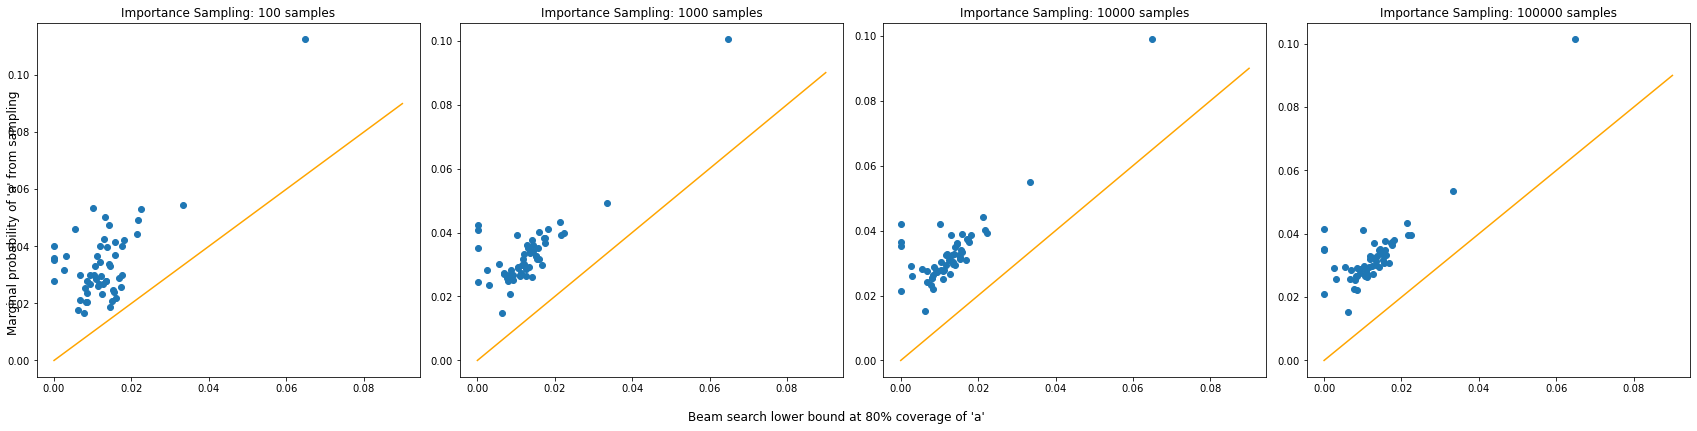

In [26]:
samples = [100,1000,10000,100000]
title = "Importance Sampling: {} samples"
fig, axs = plt.subplots(1,4, figsize = (24,6))

for i in range(len(paths)):
    data = read_pkl(paths[i])
    ref = np.arange(0,.1,0.01)
    axs[i].plot(list(ref),list(ref),linestyle="-", color = "orange")
    axs[i].scatter(lower_bound, data)
    axs[i].set_title(title.format(samples[i]))
    
fig.supxlabel("Beam search lower bound at 80% coverage of 'a'")
fig.supylabel("Marginal probability of 'a' from sampling")
plt.tight_layout()